In [1]:
import os
import sys
sys.path.append(os.pardir)

In [102]:
import datetime
import numpy as np
import pandas as pd
from sklearn import preprocessing
from credible import connectors

In [78]:
pd.options.display.float_format = '{:,.2f}'.format

### Parameters

In [3]:
engine = connectors.connect_to_sqlite()

In [4]:
businesses = pd.read_sql_table('businesses', engine)
users = pd.read_sql_table('users', engine)
reviews = pd.read_sql_table('reviews', engine)
users_meta = pd.read_sql_table('users_meta', engine)
reviews_meta = pd.read_sql_table('reviews_meta', engine)

### Dataframe

In [10]:
df = reviews.merge(
    reviews_meta, how='left', on='review_id').merge(
        users_meta, how='left', on='user_id')

In [15]:
df.drop('text', axis=1, inplace=True)

In [67]:
df.head(2)

,_id,review_id,business_id,user_id,stars,date,useful,funny,cool,newest_review_date,days_past,text_length,text_length_category,num_of_friends
0,1,Q1sbwvVQXV2734tPgoKj4Q,ujmEBvifdJM6h6RLv4wQIg,hG7b0MtEbXx5QzbzE6C_VA,1,2013-05-07 04:34:36,6,1,0,2018-11-14 06:12:10,2017,204,1,1
1,2,GJXCdrto3ASJOqKeVWPi6Q,NZnhc2sEQy3RmzKTZnqtwQ,yXQM5uF2jS6es16SJzNHfg,5,2017-01-14 21:30:33,0,0,0,2018-11-03 15:13:54,657,1561,9,52


In [84]:
features_continous = df.loc[:, ['stars', 'days_past', 'text_length', 'useful', 'funny', 'cool',
       'text_length_category', 'num_of_friends']]
features_categorical = df.loc[:, ['stars', 'text_length_category']]
features_categorical.head()

,stars,text_length_category
0,1,1
1,5,9
2,5,6
3,5,4
4,1,9


## Preprocessing

In [146]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

category_list = [f'stars_{i}' for i in range(1, 6)] + [f'textlen_{i}' for i in range(1, 11)]

scaler = MinMaxScaler()
onehot = OneHotEncoder(categories='auto', sparse=False)

values_continuous = scaler.fit_transform(features_continous)
values_categorical = onehot.fit_transform(features_categorical)

values_continuous.shape, values_categorical.shape

((6685900, 8), (6685900, 15))

In [147]:
type(values_continuous)

numpy.ndarray

In [148]:
array2D_1 = np.arange(15).reshape((3,5))
array2D_2 = np.arange(10,19).reshape(3,3)
array2D_1.shape, array2D_2.shape

((3, 5), (3, 3))

In [149]:
np.concatenate((array2D_1, array2D_2), axis=1)

array([[ 0,  1,  2,  3,  4, 10, 11, 12],
       [ 5,  6,  7,  8,  9, 13, 14, 15],
       [10, 11, 12, 13, 14, 16, 17, 18]])

In [151]:
np.concatenate((values_continuous, values_categorical), axis=1).shape

(6685900, 23)

## Data Distribution

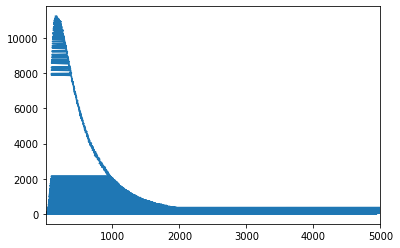

In [53]:
df.text_length.value_counts().plot()

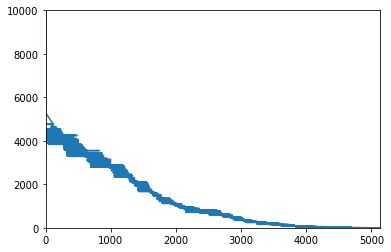

In [73]:
df.days_past.value_counts().plot(ylim=(0,10000))

In [79]:
df.days_past.describe().to_frame()

,days_past
count,"6,685,900.00"
mean,"1,021.21"
std,843.80
min,0.00
25%,352.00
50%,831.00
75%,"1,483.00"
max,"5,139.00"


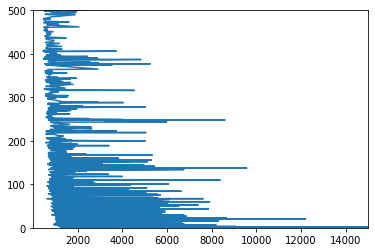

In [66]:
df.num_of_friends.value_counts().plot(ylim=(0,500))

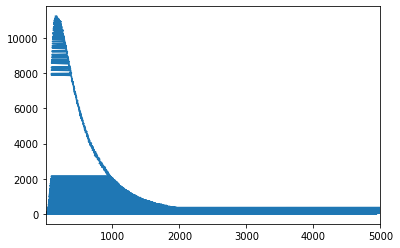

In [53]:
df.text_length.value_counts().plot()

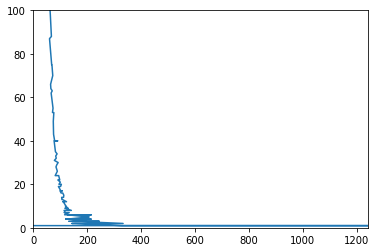

In [60]:
df.useful.value_counts().plot(ylim=(0,100))

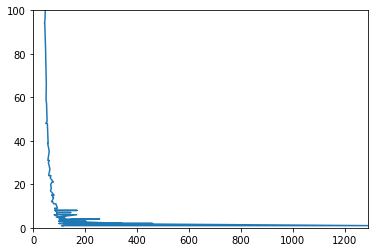

In [61]:
df.funny.value_counts().plot(ylim=(0,100))

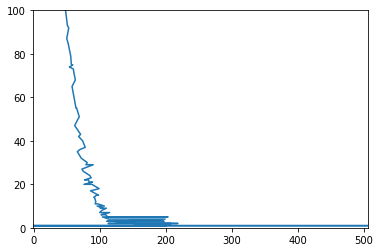

In [62]:
df.cool.value_counts().plot(ylim=(0,100))

In [23]:
from sklearn.cluster import KMeans
neigh = KMeans(n_clusters=2, random_state=0).fit(X)

In [34]:
y_kmeans = neigh.predict(X)

In [28]:
centers = kmeans.cluster_centers_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [29]:
import matplotlib.pyplot as plt

In [40]:
X.values[:, 6]

array([1, 9, 6, ..., 1, 7, 7])

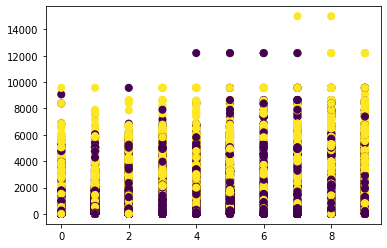

In [41]:
plt.scatter(X.values[:, 6], X.values[:, 7], c=y_kmeans, s=50)

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);